# PART 1

In [1]:
# Import Basic Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the Nigerian Pidgin Tweets Sentiments data
df = pd.read_csv('/content/14000 Nigerian Pidgin Tweets and Sentiments.csv')
df.head()

,Clean_Content,Human_Label
0,we don realize hin importance after that city ...,positive
1,dem don nominate and second senator ovie omoag...,neutral
2,don come give una free awoof ...awoof!!! o .. ...,positive
3,coronavirus update: washing your hands with so...,neutral
4,"people dey talk about iniesta, paul scholes, p...",positive


In [3]:
# Chick the infomation of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Clean_Content  14000 non-null  object
 1   Human_Label    14000 non-null  object
dtypes: object(2)
memory usage: 218.9+ KB


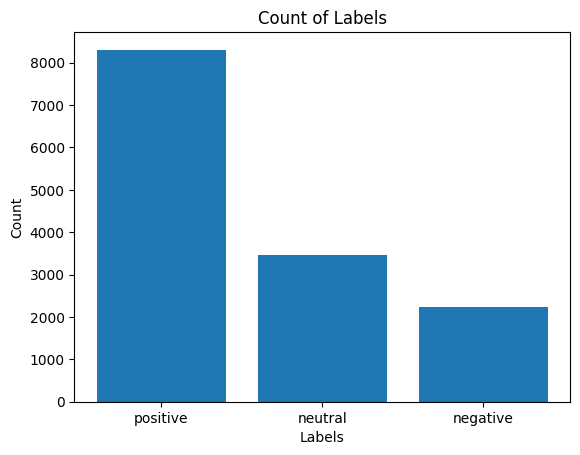

In [4]:
# Counting the labels
label_counts = df['Human_Label'].value_counts()

# Creating the bar plot
plt.bar(label_counts.index, label_counts.values)

# Adding labels and title
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Labels')

# Displaying the plot
plt.show()

In [5]:
# Dropping rows with the label 'neutral'
df = df[df['Human_Label'] != 'neutral']

# Printing the updated DataFrame
df.head()

,Clean_Content,Human_Label
0,we don realize hin importance after that city ...,positive
2,don come give una free awoof ...awoof!!! o .. ...,positive
4,"people dey talk about iniesta, paul scholes, p...",positive
5,election latest,positive
6,ht: 1 v leicester city 0. thank god for mason ...,positive


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10547 entries, 0 to 13999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Clean_Content  10547 non-null  object
 1   Human_Label    10547 non-null  object
dtypes: object(2)
memory usage: 247.2+ KB


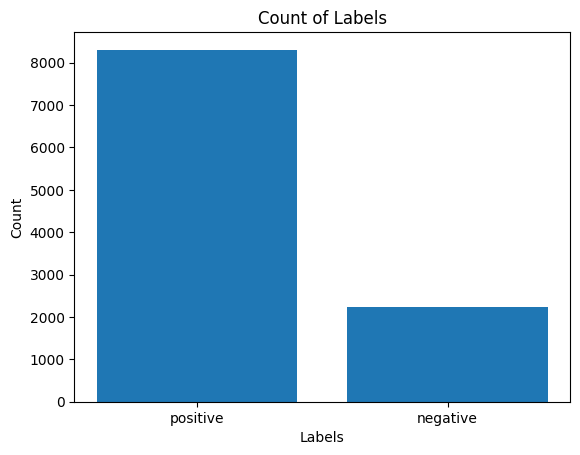

In [7]:
# Counting the labels
label_counts = df['Human_Label'].value_counts()

# Creating the bar plot
plt.bar(label_counts.index, label_counts.values)

# Adding labels and title
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Labels')

# Displaying the plot
plt.show()

In [8]:
# Encoding the labels
label_mapping = {'negative': 0, 'positive': 1}
df['Label'] = df['Human_Label'].map(label_mapping)

# Printing the updated DataFrame
df.head()

,Clean_Content,Human_Label,Label
0,we don realize hin importance after that city ...,positive,1
2,don come give una free awoof ...awoof!!! o .. ...,positive,1
4,"people dey talk about iniesta, paul scholes, p...",positive,1
5,election latest,positive,1
6,ht: 1 v leicester city 0. thank god for mason ...,positive,1


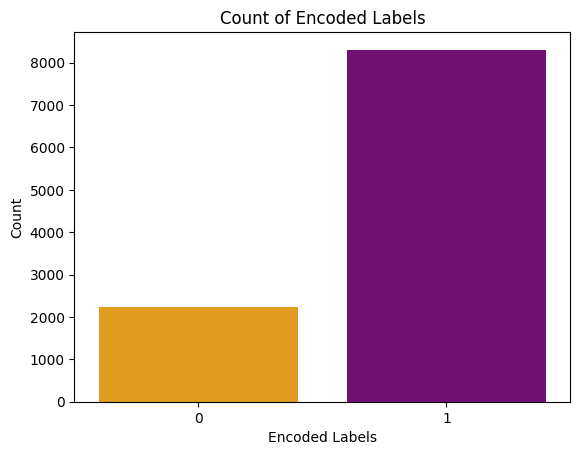

In [9]:
# Defining colors for the bars
colors = ['orange', 'purple']

# Creating the count plot with colored bars
sns.countplot(data=df, x='Label', palette=colors)

# Adding labels and title
plt.xlabel('Encoded Labels')
plt.ylabel('Count')
plt.title('Count of Encoded Labels')

# Displaying the plot
plt.show()


In [10]:
# Dropping the 'Human_Label' column
df = df.drop('Human_Label', axis=1)

# Printing the updated DataFrame
df.head()

,Clean_Content,Label
0,we don realize hin importance after that city ...,1
2,don come give una free awoof ...awoof!!! o .. ...,1
4,"people dey talk about iniesta, paul scholes, p...",1
5,election latest,1
6,ht: 1 v leicester city 0. thank god for mason ...,1


In [11]:
# Save the DataFrame as a CSV file
df.to_csv('Sarcasm.csv', index=False)

# PART 2

# Load and preprocess the data

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [13]:

data = pd.read_csv('/content/Sarcasm.csv')
data.head(10)

,Clean_Content,Label
0,we don realize hin importance after that city ...,1
1,don come give una free awoof ...awoof!!! o .. ...,1
2,"people dey talk about iniesta, paul scholes, p...",1
3,election latest,1
4,ht: 1 v leicester city 0. thank god for mason ...,1
5,sabi pikin pellegrini epp italo close shop yes...,1
6,which full-back is better? for luke shaw like...,1
7,we dey wish hapi baidae as him turn 25 years ...,1
8,"on dis day for 1927, tanda as official club fo...",1
9,we dey live dey torchlight how pipo and dey p...,1


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10547 entries, 0 to 10546
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Clean_Content  10547 non-null  object
 1   Label          10547 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 164.9+ KB


In [15]:
import re
import nltk
from nltk.stem import WordNetLemmatizer

# Importing the necessary NLTK resources
nltk.download('punkt')
nltk.download('wordnet')

# Define the preprocess_pidgin_data function
def preprocess_pidgin_data(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenize the text
    tokens = nltk.word_tokenize(text)

    # Defining custom list of Pidgin stopwords
    stop_words = ['na', 'i', 'am', 'we', 'dem', 'una', 'im', 'for', 'of', 'to', 'and', 'an', 'as', 'e', 'she', 'he',
    'you', 'them', 'my', 'your', 'his', 'her', 'our', 'their', 'make', 'go', 'come', 'see', 'get',
    'no', 'not', 'yes', 'so', 'but', 'if', 'when', 'where', 'why', 'who', 'what', 'which', 'how', 'many',
    'much', 'some', 'any', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten']

    pidgin_stopwords = stop_words

    # Remove stop words
    tokens = [token for token in tokens if token not in pidgin_stopwords]

    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a single string
    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

preprocessed_text = data['Clean_Content'].apply(preprocess_pidgin_data)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Split the dataset

In [17]:
# SPlitting dataset to Train and Test set
X_train, X_test, y_train, y_test = train_test_split(preprocessed_text, data['Label'],
                                                    test_size=0.2, random_state=42)


# Feature extraction

In [18]:
# Extracting the features of the dataset
vectorizer = TfidfVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)


# Train the model

In [19]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(X_train_features, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

# Evaluate the model

In [20]:
# Evaluating the model with Accuracy, Precision, Recall and F1-Score
y_pred = rf_classifier.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")


Accuracy: 0.8957345971563981
Precision: 0.9152542372881356
Recall: 0.9585798816568047
F1-score: 0.9364161849710982


In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 270,  150],
       [  70, 1620]])

<Axes: >

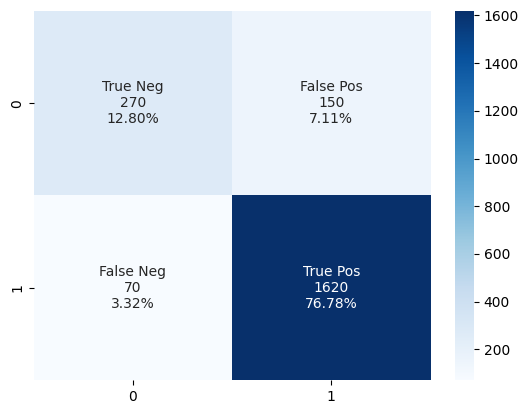

In [22]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')